In [1]:
# -----------04_DAWPYT_PRJ_01_(Effect_of_Weather)--------------

In this chapter, you will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. You will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

**INSTRUCTIONS**

*   Read ``weather.csv`` into a ``DataFrame`` named ``weather``.
*   Select the temperature columns (``TMIN``, ``TAVG``, ``TMAX``) and print their ``summary statistics`` using the ``.describe()`` method.
*   Create a **box plot** to visualize the temperature columns.
*   Display the plot.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
weather = pd.read_csv("weather.csv")

In [4]:
weather.head(5)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
weather.tail(5)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
8017,USW00014765,2015-12-27,9.17,51.0,61.0,44.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8018,USW00014765,2015-12-28,12.30,40.0,44.0,30.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8019,USW00014765,2015-12-29,12.53,33.0,40.0,28.0,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8020,USW00014765,2015-12-30,6.93,30.0,35.0,27.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8021,USW00014765,2015-12-31,8.05,39.0,50.0,35.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
weather.shape

(8022, 26)

In [7]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [8]:
weather[["TMIN","TAVG","TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


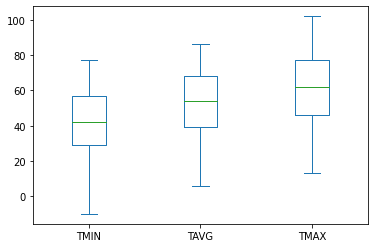

In [9]:
weather[["TMIN","TAVG","TMAX"]].plot(kind="box")
plt.show()

## Plotting the temperature difference

**INSTRUCTIONS**

*   Create a new column in the ``weather`` ``DataFrame`` named ``TDIFF`` that represents the difference between the maximum and minimum temperatures.
*   Print the summary statistics for ``TDIFF`` using the ``.describe()`` method.
*   Create a histogram with ``20 bins`` to visualize ``TDIFF``.
*   Display the plot.

In [10]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [11]:
weather.TDIFF.describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

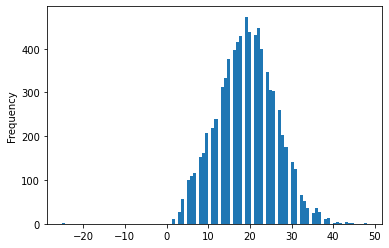

In [12]:
weather.TDIFF.plot(kind="hist", bins=100)
plt.show()

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, you'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

**INSTRUCTIONS**

*   Copy the columns ``WT01`` through ``WT22`` from ``weather`` to a new ``DataFrame`` named ``WT``.
*   Calculate the sum of each row in ``WT``, and store the results in a new weather column named ``bad_conditions``.
*   Replace any ``missing values`` in ``bad_conditions`` with a ``0``. (This has been done for you.)
*   Create a **histogram** to visualize ``bad_conditions``, and then display the plot.

In [13]:
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0


In [14]:
WT = weather.loc[:, "WT01":"WT22"]

In [15]:
WT.head()

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
weather["bad_conditions"] = WT.sum(axis="columns")
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.0
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0


In [17]:
weather.sample(n = 5)

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF,bad_conditions
1678,USC00379423,2009-08-19,NaN,NaN,92.0,71.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,0.0
5855,USW00014765,2010-01-25,16.33,NaN,56.0,40.0,1.0,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,16.0,5.0
4012,USW00014765,2005-01-08,6.04,32.0,34.0,29.0,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,5.0,6.0
5043,USW00014765,2007-11-05,5.14,NaN,56.0,36.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,0.0
2351,USC00379423,2011-06-26,NaN,NaN,76.0,57.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,0.0


In [18]:
weather["bad_conditions"] = weather.bad_conditions.fillna(0).astype("int")

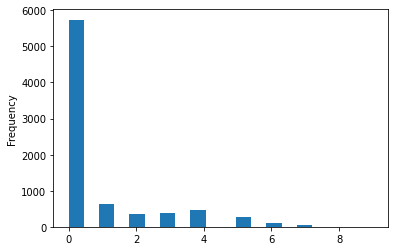

In [20]:
weather.bad_conditions.plot(kind="hist", bins=20)
plt.show()

In [21]:
weather.bad_conditions.value_counts(dropna=False)

0    5738
1     628
4     476
3     380
2     368
5     282
6     101
7      41
9       4
8       4
Name: bad_conditions, dtype: int64

## Rating the weather conditions

In the previous exercise, you counted the number of bad weather conditions each day. In this exercise, you'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

**INSTRUCTIONS**

*   Count the **unique** values in the ``bad_conditions`` column and sort the ``index``. 
*   Create a ``dictionary`` called ``mapping`` that maps the ``bad_conditions`` integers to strings as specified above.
*   Convert the ``bad_conditions`` integers to strings using the ``mapping`` and store the results in a new column called ``rating``.
*   Count the **unique** values in ``rating`` to verify that the integers were properly converted to strings.

In [22]:
weather.bad_conditions.value_counts().sort_index()

0    5738
1     628
2     368
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

In [23]:
mapping = {0:"good", 1:"bad", 2:"bad", 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse"}

In [24]:
weather["rating"] = weather.bad_conditions.map(mapping)

In [25]:
weather.rating.value_counts()

good     5738
bad      1852
worse     428
Name: rating, dtype: int64

## Changing the data type to category

Since the ``rating`` column only has a few possible values, you'll change its data type to ``category`` in order to store the data more efficiently. You'll also specify a logical order for the categories, which will be useful for future exercises.

**INSTRUCTIONS**

*   Create a ``list`` object called ``cats`` that lists the weather ratings in a logical order: ``'good'``, ``'bad'``, ``'worse'``.
*   Change the data type of the ``rating`` column from ``object`` to ``category``. Make sure to use the ``cats list`` to define the category ordering.
*   Examine the ``head`` of the ``rating`` column to confirm that the categories are logically ordered.

In [26]:
weather.rating[0]

'good'

In [27]:
type(weather.rating[0])

str

In [28]:
categ = {"good","bad","worse"}

In [29]:
weather["rating"] = pd.Categorical(weather.rating, categories=categ, ordered=True)

In [30]:
weather.rating.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): ['good' < 'worse' < 'bad']

## Preparing the DataFrames

In this exercise, you'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, you'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, you'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

**INSTRUCTIONS**

* Reset the ``index`` of the ``ri`` ``DataFrame``.

* Examine the ``head`` of ``ri`` to verify that ``stop_datetime`` is now a ``DataFrame`` column, 
and the ``index`` is now the default ``integer`` index.

* Create a new ``DataFrame`` named ``weather_rating`` that contains only the ``DATE`` and ``rating`` columns from the ``weather`` ``DataFrame``.

* Examine the ``head`` of ``weather_rating`` to verify that it contains the proper columns.

> Before starting your work from this part of this chapter **repeat the steps which you did in the first chapter for preparing the ``ri`` data.** Continue to this chapter based on where you were in the end of the first chapter.

In [31]:
ri = pd.read_csv('RI_cleaned.csv')

drop_columns=["state", "county_name", "county_fips", "fine_grained_location"]
ri.drop(drop_columns, axis='columns', inplace=True)

ri.dropna(subset=['driver_gender'], inplace=True)

ri['is_arrested'] = ri.is_arrested.astype('bool')

combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

ri.set_index('stop_datetime', inplace=True)

C:\Users\engin\AppData\Local\Temp\ipykernel_5296\279977290.py:1: DtypeWarning: Columns (8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('RI_cleaned.csv')


In [33]:
ri.reset_index(inplace=True)

In [34]:
ri.head(2)

,stop_datetime,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,500,M,1987.0,18.0,W,...,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4


In [35]:
weather_rating = weather[["DATE", "rating"]]
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


## Merging the DataFrames

Merging the DataFrames
In this exercise, you'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, you'll set ``stop_datetime`` as the index, which is the column you saved in the previous exercise.

Examine the shape of the ``ri`` ``DataFrame``.
``Merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` using a ``left join``.
Examine the ``shape`` of ``ri_weather`` to confirm that it has two more columns but the same number of rows as ``ri``.
Replace the ``index`` of ``ri_weather`` with the ``stop_datetime`` column.

In [37]:
ri.shape

(480584, 23)

In [38]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on="stop_date", right_on="DATE", how="left")

In [39]:
ri_weather.shape

(959952, 25)

In [40]:
ri_weather.set_index("stop_datetime", inplace=True)

In [41]:
ri_weather.head(1)

,id,stop_date,stop_time,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,600,M,1985.0,20.0,W,White,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,2005-01-02,good


## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Find out below!

- **First**, you'll calculate the **overall arrest rate**.

- **Then**, you'll calculate the **arrest rate** for each of the **weather ratings** you previously assigned.

- **Finally**, you'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since you previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [42]:
ri_weather.is_arrested.mean()

0.0345715202426788

In [43]:
ri_weather.groupby("rating").is_arrested.mean()

rating
good     0.034080
worse    0.039064
bad      0.035226
Name: is_arrested, dtype: float64

In [46]:
ri_weather.groupby("rating").is_arrested.mean()[0]

0.03408004185494004

In [47]:
ri_weather.groupby(["violation","rating"]).is_arrested.mean()

violation            rating
Equipment            good      0.059125
                     worse     0.094515
                     bad       0.059581
Moving violation     good      0.056805
                     worse     0.060771
                     bad       0.058081
Other                good      0.080682
                     worse     0.058005
                     bad       0.084950
Registration/plates  good      0.083238
                     worse     0.098551
                     bad       0.092634
Seat belt            good      0.026339
                     worse     0.000000
                     bad       0.028795
Speeding             good      0.013494
                     worse     0.016681
                     bad       0.013348
Name: is_arrested, dtype: float64

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this exercise, you'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

**INSTRUCTIONS**

- Save the output of the ``.groupby()`` operation from the last exercise as a new object, ``arrest_rate``.
- Print the ``arrest_rate`` ``Series`` and examine it.
- Print the arrest rate for ``moving violations`` in bad weather.
- Print the arrest rates for ``speeding violations`` in all three weather conditions.

In [48]:
arrest_rate = ri_weather.groupby(["violation","rating"]).is_arrested.mean()

In [49]:
arrest_rate

violation            rating
Equipment            good      0.059125
                     worse     0.094515
                     bad       0.059581
Moving violation     good      0.056805
                     worse     0.060771
                     bad       0.058081
Other                good      0.080682
                     worse     0.058005
                     bad       0.084950
Registration/plates  good      0.083238
                     worse     0.098551
                     bad       0.092634
Seat belt            good      0.026339
                     worse     0.000000
                     bad       0.028795
Speeding             good      0.013494
                     worse     0.016681
                     bad       0.013348
Name: is_arrested, dtype: float64

## Reshaping the arrest rate data

In this exercise, you'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables you to access the full range of ``DataFrame`` methods.

Then, you'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives you more than one way to reach the same result!

**INSTRUCTIONS**

- ``unstack`` the ``arrest_rate`` ``Series`` to ``reshape`` it into a ``DataFrame``.
- Create the exact same ``DataFrame`` using a ``pivot table``! Each of the three ``.pivot_table()`` parameters should be specified as one of the ``ri_weather`` columns.

In [50]:
arrest_rate.unstack()

rating,good,worse,bad
violation,,,
Equipment,0.059125,0.094515,0.059581
Moving violation,0.056805,0.060771,0.058081
Other,0.080682,0.058005,0.084950
Registration/plates,0.083238,0.098551,0.092634
Seat belt,0.026339,0.000000,0.028795
Speeding,0.013494,0.016681,0.013348


In [53]:
ri_weather.pivot_table(index="violation", columns="rating", values="is_arrested")

rating,good,worse,bad
violation,,,
Equipment,0.059125,0.094515,0.059581
Moving violation,0.056805,0.060771,0.058081
Other,0.080682,0.058005,0.084950
Registration/plates,0.083238,0.098551,0.092634
Seat belt,0.026339,0.000000,0.028795
Speeding,0.013494,0.016681,0.013348


In [54]:
ri_weather.pivot_table(index="violation", columns="rating", values="is_arrested").transpose

<bound method DataFrame.transpose of rating                   good     worse       bad
violation                                        
Equipment            0.059125  0.094515  0.059581
Moving violation     0.056805  0.060771  0.058081
Other                0.080682  0.058005  0.084950
Registration/plates  0.083238  0.098551  0.092634
Seat belt            0.026339  0.000000  0.028795
Speeding             0.013494  0.016681  0.013348>